In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from sklearn import preprocessing

In [2]:
# sourcery skip: my-custom-rule
SH_SY5Y_PATH = pathlib.Path("../../Data/clean/Plate2/nELISA_plate_430420_SH_SY5Y.csv")

manual_cluster_1_path = pathlib.Path(
    "../../Data/clean/Plate2/Manual_Treatment_Clusters_1.csv"
)

manual_cluster_2_path = pathlib.Path(
    "../../Data/clean/Plate2/Manual_Treatment_Clusters_2.csv"
)

SHSY5Y_df = pd.read_csv(SH_SY5Y_PATH)

manual_clusters_1 = pd.read_csv(manual_cluster_1_path)
manual_clusters_2 = pd.read_csv(manual_cluster_2_path)

In [3]:
# select data only columns and make floats
nELISA_data_values = SHSY5Y_df.filter(like="NSU", axis=1)
nELISA_data_values = nELISA_data_values.astype("float")
nELISA_data_values.head()

,Activin A [NSU],AITRL (GITR Ligand) [NSU],Amphiregulin [NSU],Amyloid beta [NSU],APRIL [NSU],BAFF [NSU],BCMA (TNFRSF17) [NSU],BDNF [NSU],BMP2 [NSU],BMP3 [NSU],...,TWEAK [NSU],uPA [NSU],VCAM-1 [NSU],VEGF Receptor 2 (Flk-1) [NSU],VEGF-A (165) [NSU],VEGF-C [NSU],VEGF-D [NSU],VEGFR-1 [NSU],WISP-1 (CCN4) [NSU],XCL1 (Lymphotactin) [NSU]
0,0.050305,-0.046947,1.361487,0.553065,3.161210,0.323546,0.200321,-4.628914,-1.455375,1.411887,...,-1.053944,1.931219,0.439120,-1.538831,30.157265,-0.733615,0.413442,-0.897618,-1.841281,0.048389
1,-0.136531,1.014299,-1.829310,-2.860160,3.326872,-0.293770,0.520861,1.004449,-0.906373,2.202077,...,-0.871663,3.274879,-0.738697,0.816301,29.581649,-0.939235,-0.385612,-1.410167,-1.406394,-0.863555
2,1.240569,0.229261,1.995245,-2.499106,-4.232099,-1.807823,-0.656196,0.746356,-0.001466,-3.299824,...,-0.251360,1.923855,-0.523146,0.204165,31.313849,-2.824671,1.220794,-1.488981,1.496881,-0.107094
3,0.629592,1.492948,-1.857380,-0.308989,-0.640024,0.713347,-0.554004,-1.260493,0.067077,1.431232,...,-1.318833,2.165008,-0.282784,-0.779901,28.934441,-0.304395,0.177668,-0.300231,0.083451,-1.798261
4,-0.375887,0.390727,-0.026048,-0.563376,1.802794,0.231624,1.355083,-0.230052,-0.209977,0.476215,...,-1.003948,1.439554,0.407104,-0.753367,32.680499,-1.739692,-1.222531,0.841332,-0.464893,0.077351


In [4]:
# normalize data via max value in each column
max_values = nELISA_data_values.max()  # find max value in each column
nELISA_data_values_sensor_max_norm = nELISA_data_values.div(
    max_values
)  # divide each value in each column by max value in that column
nELISA_data_values_sensor_max_norm.head()
# min max normalization via sklearn


# normalize data via min max normalization
min_max_scaler = preprocessing.MinMaxScaler()
nELISA_data_values_min_max_norm = min_max_scaler.fit_transform(nELISA_data_values)
nELISA_data_values_min_max_norm = pd.DataFrame(
    nELISA_data_values_min_max_norm, columns=nELISA_data_values.columns
)
nELISA_data_values_min_max_norm.head()

,Activin A [NSU],AITRL (GITR Ligand) [NSU],Amphiregulin [NSU],Amyloid beta [NSU],APRIL [NSU],BAFF [NSU],BCMA (TNFRSF17) [NSU],BDNF [NSU],BMP2 [NSU],BMP3 [NSU],...,TWEAK [NSU],uPA [NSU],VCAM-1 [NSU],VEGF Receptor 2 (Flk-1) [NSU],VEGF-A (165) [NSU],VEGF-C [NSU],VEGF-D [NSU],VEGFR-1 [NSU],WISP-1 (CCN4) [NSU],XCL1 (Lymphotactin) [NSU]
0,0.595518,0.564662,0.538727,0.751911,0.796710,0.506570,0.557007,0.000000,0.130110,0.585972,...,0.318056,0.180171,0.524795,0.299154,0.296559,0.278150,0.570920,0.344809,0.232809,0.725177
1,0.549004,0.856272,0.127459,0.070602,0.810357,0.359850,0.600601,0.682277,0.288149,0.681883,...,0.356741,0.305277,0.271509,0.767602,0.260110,0.250799,0.457524,0.225962,0.300728,0.459638
2,0.891845,0.640559,0.620414,0.142671,0.187645,0.000000,0.440517,0.651019,0.548641,0.014080,...,0.488387,0.179485,0.317863,0.645845,0.369798,0.000000,0.685494,0.207687,0.754146,0.679904
3,0.739737,0.987796,0.123841,0.579838,0.483562,0.599216,0.454416,0.407962,0.568372,0.588320,...,0.261839,0.201939,0.369552,0.450109,0.219126,0.335244,0.537461,0.483328,0.533404,0.187470
4,0.489414,0.684927,0.359885,0.529060,0.684803,0.484723,0.714058,0.532762,0.488618,0.472403,...,0.328667,0.134393,0.517910,0.455387,0.456338,0.144323,0.338754,0.748028,0.447766,0.733610


In [5]:
# drop columns that are named with NSU
Metadata = SHSY5Y_df.drop(SHSY5Y_df.filter(like="NSU", axis=1), axis=1)
Metadata = Metadata.drop(SHSY5Y_df.filter(like="pgML", axis=1), axis=1)

In [6]:
analysis_df = pd.concat([Metadata, nELISA_data_values_min_max_norm], axis=1)

In [7]:
# add manual clusters columns to dataframe
nELISA_plate_430420 = pd.merge(
    analysis_df,
    manual_clusters_2,
    on=(
        "inducer1",
        "inducer1_concentration_value",
        "inhibitor",
        "inhibitor_concentration_value",
        "inducer2",
        "inducer2_concentration_value",
    ),
    how="inner",
)

In [8]:
# dose column merge
conditions = [
    (nELISA_plate_430420["inducer2"].isnull()),
    nELISA_plate_430420["inducer2"].notnull(),
]

results = [
    (
        nELISA_plate_430420["inducer1"]
        + "_"
        + nELISA_plate_430420["inducer1_concentration"].astype(str)
        + "_"
        + nELISA_plate_430420["inhibitor"].astype(str)
        + "_"
        + nELISA_plate_430420["inhibitor_concentration"].astype(str)
    ).astype(str),
    (
        nELISA_plate_430420["inducer1"]
        + "_"
        + nELISA_plate_430420["inducer1_concentration"].astype(str)
        + "_"
        + nELISA_plate_430420["inducer2"]
        + "_"
        + nELISA_plate_430420["inducer2_concentration"].astype(str)
        + "_"
        + nELISA_plate_430420["inhibitor"].astype(str)
        + "_"
        + nELISA_plate_430420["inhibitor_concentration"].astype(str)
    ).astype(str),
]
nELISA_plate_430420["Treatment_and_Dose"] = np.select(conditions, results)


results = [
    (nELISA_plate_430420["inducer1"]).astype(str),
    (nELISA_plate_430420["inducer1"] + "_" + nELISA_plate_430420["inducer2"]).astype(
        str
    ),
]
nELISA_plate_430420["Treatments"] = np.select(conditions, results)

In [9]:
# select rows that contain 'Thapsigargin_10 µM_DMSO_0.03%' from Treatment_and_Dose column
nELISA_plate_430420 = nELISA_plate_430420[
    nELISA_plate_430420["Treatments"].isin(
        [
            "Thapsigargin",
            "LPS",
            "DMSO",
        ]
    )
]

# select rows that contain 'Thapsigargin_10 µM_DMSO_0.03%' from Treatment_and_Dose column
nELISA_plate_430420 = nELISA_plate_430420[
    nELISA_plate_430420["inhibitor"].isin(["DMSO"])
]

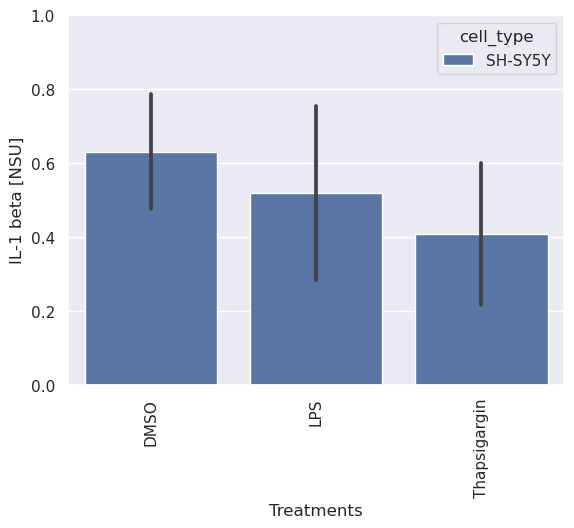

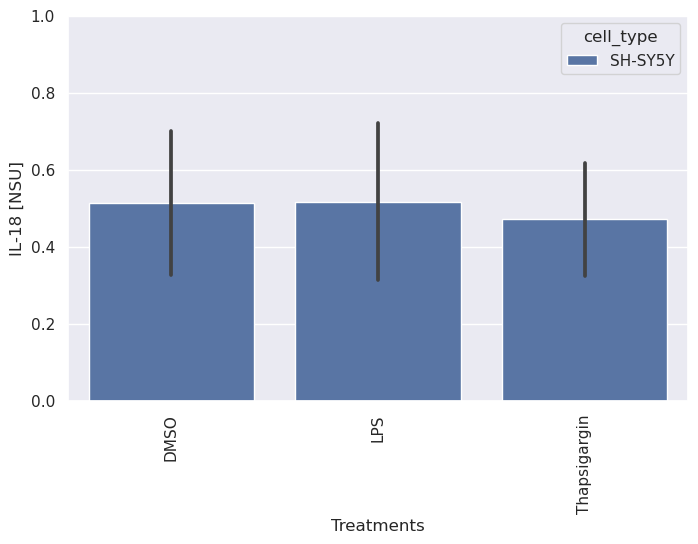

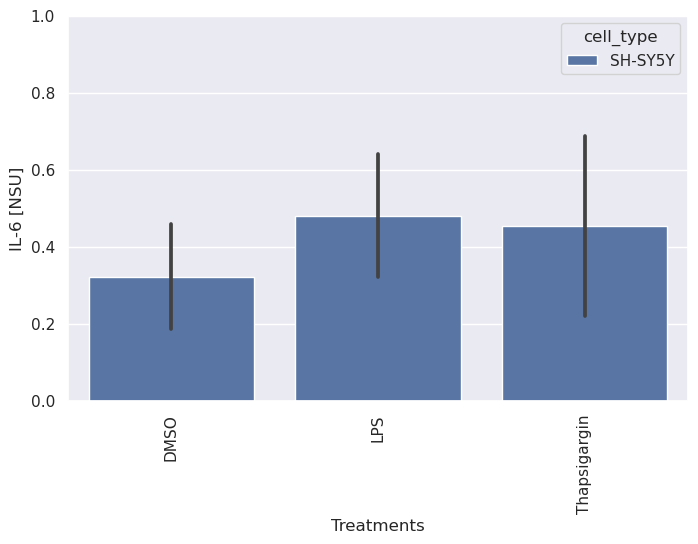

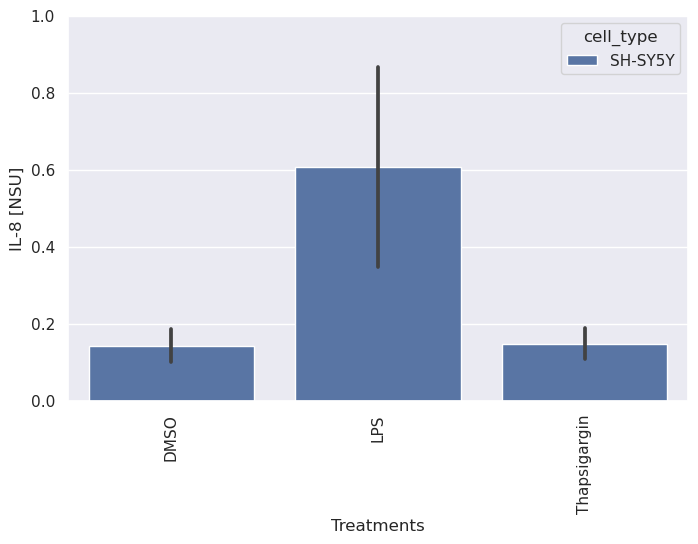

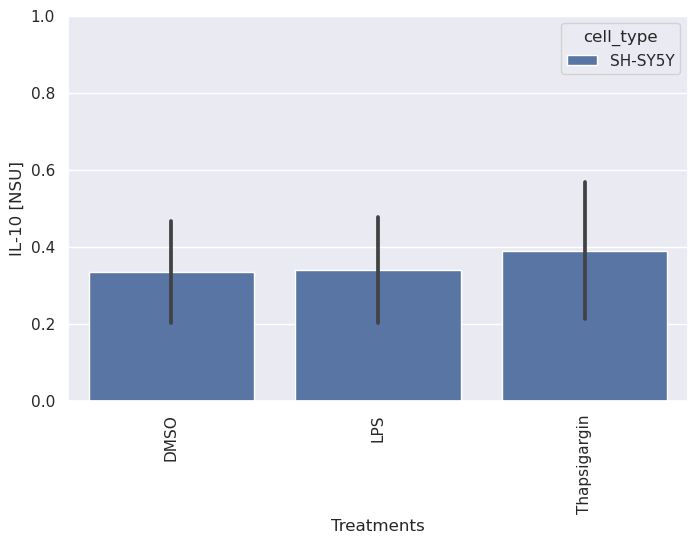

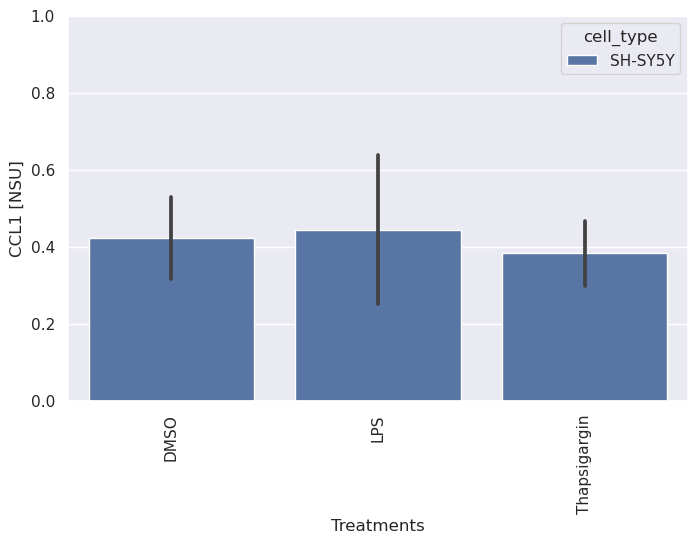

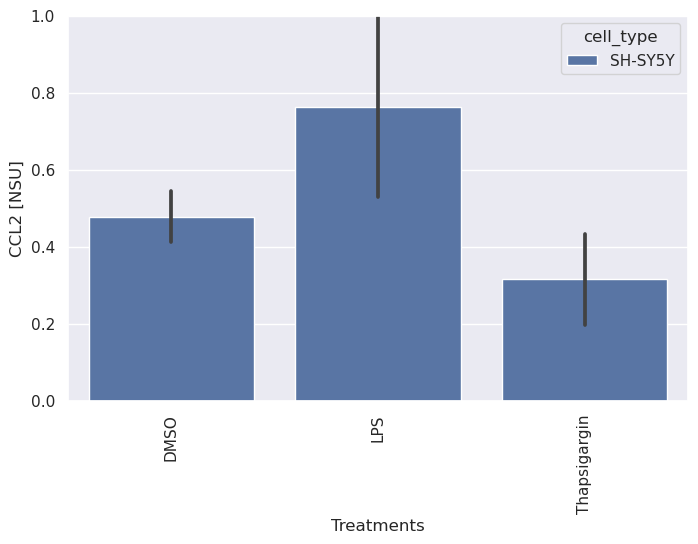

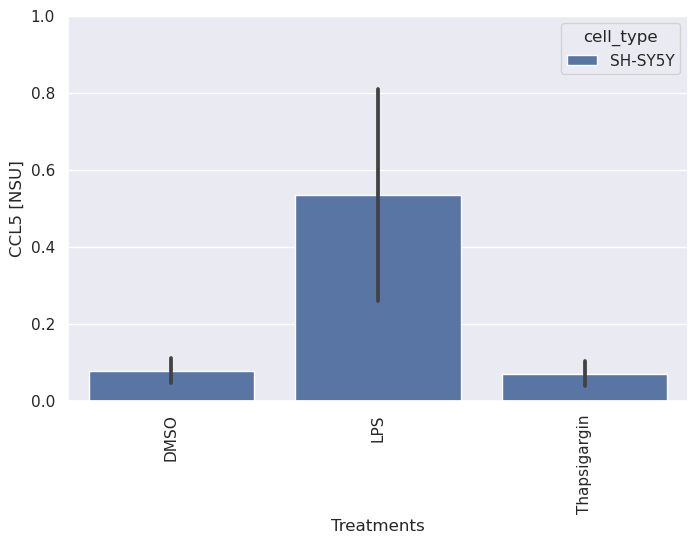

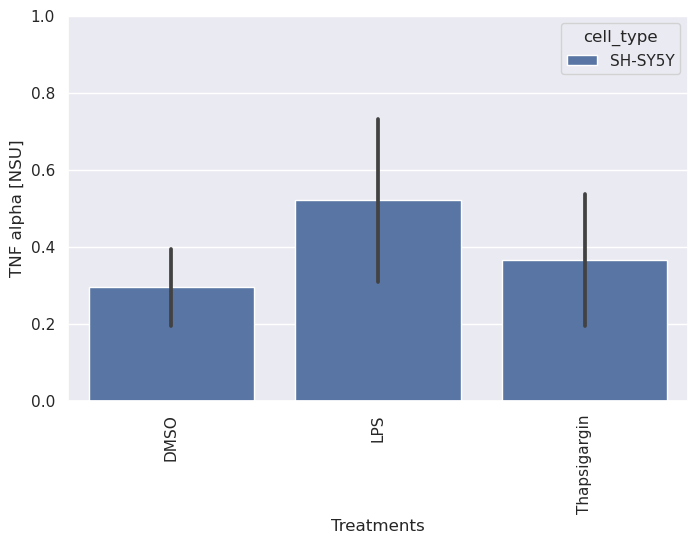

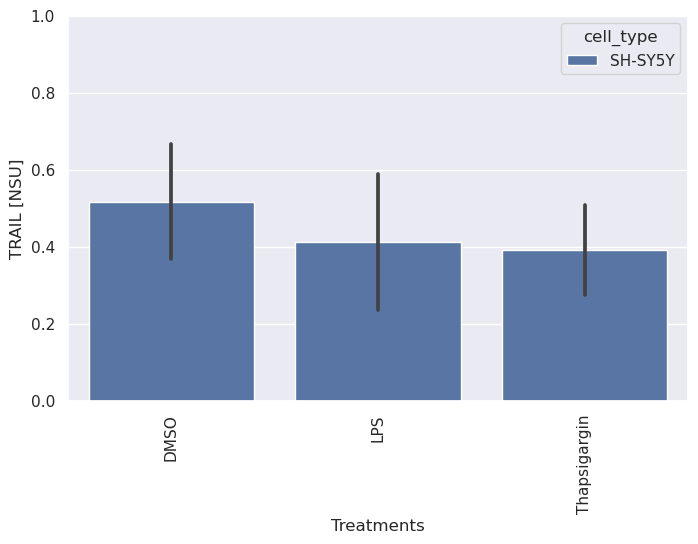

In [10]:
def plot_cytokines(df, cytokine, cell_type):
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize": (8, 5)})
    # plot a bar chart
    sns.barplot(
        y=cytokine,
        x="Treatments",
        hue="cell_type",
        data=df,
        estimator=np.mean,
        errorbar=("sd"),
    )
    plt.xticks(rotation=90)
    plt.ylim(0, 1)
    plt.ylabel(cytokine)
    plt.savefig(f"figures/{cytokine}_{cell_type}.png", bbox_inches="tight")
    plt.show()
    plt.close()


cell_type = nELISA_plate_430420["cell_type"].unique()[0]
# plot all cytokines
plot_cytokines(nELISA_plate_430420, "IL-1 beta [NSU]", cell_type)
plot_cytokines(nELISA_plate_430420, "IL-18 [NSU]", cell_type)
plot_cytokines(nELISA_plate_430420, "IL-6 [NSU]", cell_type)
plot_cytokines(nELISA_plate_430420, "IL-8 [NSU]", cell_type)
plot_cytokines(nELISA_plate_430420, "IL-10 [NSU]", cell_type)
plot_cytokines(nELISA_plate_430420, "CCL1 [NSU]", cell_type)
plot_cytokines(nELISA_plate_430420, "CCL2 [NSU]", cell_type)
plot_cytokines(nELISA_plate_430420, "CCL5 [NSU]", cell_type)
plot_cytokines(nELISA_plate_430420, "TNF alpha [NSU]", cell_type)
plot_cytokines(nELISA_plate_430420, "TRAIL [NSU]", cell_type)

In [11]:
# open pdf file
with PdfPages(f"figures/inducers_{cell_type}.pdf") as pdf:
    # plot all cytokines and selected inducer and plot them in a pdf
    for i in nELISA_plate_430420.filter(like="NSU", axis=1).columns:
        plt.figure()
        plt.tight_layout()
        sns.set(rc={"figure.figsize": (8, 5)})
        # plot a bar chart
        sns.barplot(
            y=nELISA_plate_430420[i],
            x="inducer1",
            data=nELISA_plate_430420,
            hue="cell_type",
            estimator=np.mean,
            # standard deviation errorbars
            errorbar=("sd"),
        )
        plt.xticks(rotation=45)
        pdf.savefig(bbox_inches="tight")
        plt.close()

In [ ]:
# open pdf file
with PdfPages(f"figures/death_type_{cell_type}.pdf") as pdf:
    # plot all cytokines and selected inducer and plot them in a pdf
    for i in nELISA_plate_430420.filter(like="NSU", axis=1).columns:
        plt.figure()
        plt.tight_layout()
        sns.set(rc={"figure.figsize": (8, 5)})
        # plot a bar chart
        sns.barplot(
            y=nELISA_plate_430420[i],
            x="Function",
            data=nELISA_plate_430420,
            hue="cell_type",
            estimator=np.mean,
            errorbar=("sd"),
        )
        pdf.savefig(bbox_inches="tight")
        plt.close()